### DTSA 5511 Introduction to Deep Learning - Mini Project 2
Project Title: Disaster Tweets Detection: LSTM vs. GRU <br>
Date: 2023 Nov 21 <br>
Author: Tsai-Yun Li <br>
Course Lecturer: Geena Kim <br>
Orginzation: University of Colorado Boulder <br>
Kaggle Competition Name: Natural Language Processing with Disaster Tweets <br>
GitHub Repository Link: https://github.com/TsaiYunLi/ML3_Miniporj2_TsaiYunLi

### Table of Contents
1. Problem Description
2. Data Description
3. Exploratory Data Analysis (EDA)
<br> 3.1 EDA on the Dataframes
<br> 3.2 EDA on the Text Data Using NLP Techniques
4. Model Building, Training, Optimizing, and Evaluating
<br> 4.1 Data Splitting
<br> 4.2 Model Input Preparation: Preparing the Text Data for the RNN Models
<br> 4.3 The LSTM Model
<br> 4.4 The GRU Model
5. Results
6. Conclusion and Limitations
7. References

### 1. Problem Description
This is a NLP binary classification practice task on the Kaggle platform. The goal of this Kaggle task is to detect tweets about disasters and label them as 1 when positive and 0 when negative.

I have decided to build and compare an Long Short-Term Memory (LSTM) model and a Gated Recurrent (GRU) model for this Kaggle task. These two recurrent neural network (RNN) models are suitable for this task because that they can capture long-term dependency and have context sensitivity. The tweets can be viewed as sequences of words, in which the meaning of each words can depend on previous words. The LSTM and GRU models can handle this kind of sequential data.

See links in the reference for the Kaggle competition overview and datasets.

### 2. Data Description
The Kaggle platform provides a training and a test dataset. I named them as df_train and df_test, respectively. df_train has 7613 rows and 5 columns, quoting directly from the Kaggle data page:

"id - a unique identifier for each tweet <br>
text - the text of the tweet <br>
location - the location the tweet was sent from (may be blank) <br>
keyword - a particular keyword from the tweet (may be blank) <br>
target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)"

Whereas, df_test has 3263 rows and 4 columns, 'id,''text,' 'location,' and 'keyword.'

See link in the reference section for the Kaggle datasets.

In [ ]:
# importing the original training dataset
import pandas as pd
#df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_train = pd.read_csv("https://raw.githubusercontent.com/TsaiYunLi/ML3_Miniporj2_TsaiYunLi/main/Disater%20Tweets_train.csv")
print("df_train.shape =", df_train.shape)
print("df_train.head:")
df_train.head()

df_train.shape = (7613, 5)
df_train.head:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# importing the original test dataset
#df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/TsaiYunLi/ML3_Miniporj2_TsaiYunLi/main/Disater%20Tweets_test.csv")
print("df_test.shape =", df_test.shape)
print("df_test.head:")
df_test.head()

df_test.shape = (3263, 4)
df_test.head:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### 3. Exploratory Data Analysis (EDA)
Scroll down to see EDA summaries at the end of each subsection.

### 3.1 Basic EDA on the Dataframes

In [ ]:
# checking data type and null values
print("data type and null values of df_train:")
df_train.info()
print("\n")
print("data type and null values of df_test:")
df_test.info()

data type and null values of df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


data type and null values of df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
# checking for duplicated rows
df_train_dup = df_train.duplicated().sum()
print("number of duplicated rows in df_train:", df_train_dup)
df_test_dup = df_test.duplicated().sum()
print("number of duplicated rows in df_test:", df_test_dup)

number of duplicated rows in df_train: 0
number of duplicated rows in df_test: 0


In [ ]:
# removing column 'keyword' and 'location' in df_train and df_test
# because they could be misleading or irrelevant
# and they contain many null objects
remove_col = ['keyword', 'location']
df_train = df_train.drop(columns=remove_col)
df_test = df_test.drop(columns=remove_col)

In [ ]:
# checking df_train after removing the two columns
print("shape of df_train after removing the two columns:", df_train.shape)
print("df_train.head after removing the two columns:")
df_train.head()

shape of df_train after removing the two columns: (7613, 3)
df_train.head after removing the two columns:


,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# checking df_test after removing the two columns
print("shape of df_test after removing the two columns:", df_test.shape)
print("df_test.head after removing the two columns:")
df_test.head()

shape of df_test after removing the two columns: (3263, 2)
df_test.head after removing the two columns:


,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


number of samples for each class in df_train: 0    4342
1    3271
Name: target, dtype: int64 

class ratios in df_train: 0    0.57034
1    0.42966
Name: target, dtype: float64 



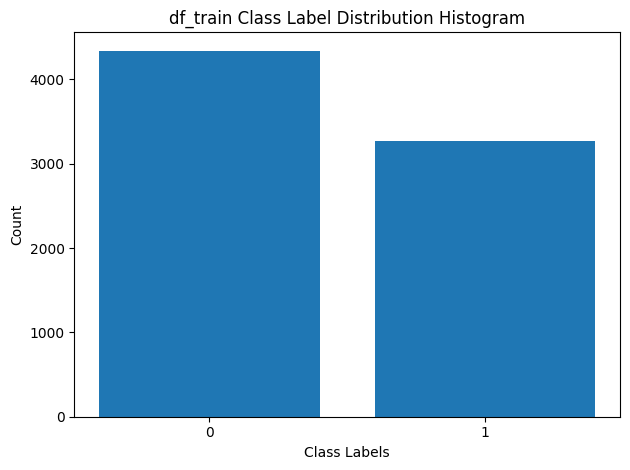

In [ ]:
# checking and visualizing class ratios in df_train
import matplotlib.pyplot as plt
class_labels = df_train['target']
class_counts = class_labels.value_counts()
class_ratios = class_counts/class_counts.sum()
print("number of samples for each class in df_train:", class_counts, "\n")
print("class ratios in df_train:", class_ratios, "\n")

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('df_train Class Label Distribution Histogram')
plt.xticks([0, 1])
plt.tight_layout()

In [ ]:
# double checking for null values and datatype after basic EDA on the dataframes
print("data type and null values of df_train after basic EDA:")
df_train.info()
print("\n")
print("data type and null values of df_test after basic EDA:")
df_test.info()

data type and null values of df_train after basic EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


data type and null values of df_test after basic EDA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3263 non-null   int64 
 1   text    3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


##### Summary for EDA on the Dataframes:
After EDA on the dataframes, there is no null or duplicated values left in df_train and df_test. <br>
1. df_train.shape = (7613, 3) with columns 'id', 'text', 'target'.
2. df_test.shape = (3263, 2) with columns 'id', 'text'.

Besides, I found out that df_train is a little bit imbalanced, with a roughly 60-40 class ratio for class 0 and 1. It is also not a very large dataset, with 7613 samples in total. Therefore, I will use a randomized and stratified to split df_train into a training and a validation subset in a section 4.1.

### 3.2 EDA on the Text Data Using NLP Techniques

In [ ]:
# libraries for nlp text preprocessing
import re
%pip install nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# inspecting the raw tweets from 6 random rows
df_train_rand_row = df_train.sample(n=6, random_state=20231119)
print("the raw tweet from a random row in df_train:")
print(df_train_rand_row['text'], "\n")
df_test_rand_row = df_test.sample(n=6, random_state=20231119)
print("the raw tweet from a random row in df_test:")
print(df_test_rand_row['text'])

the raw tweet from a random row in df_train:
1561    @D33munni @JeanNamibian noooooooo ... *proceed...
3830    Some good info to help first responders cope- ...
1079        When you get a bomb ass picture mail ????????
978     #handbag #fashion #style http://t.co/hPd3SNM6o...
538     .@bigperm28 was drafted by the @Avalanche in 2...
6569    Dear @POTUS In the name of humanityI apologize...
Name: text, dtype: object 

the raw tweet from a random row in df_test:
951     Per Malaysia's PM 'this piece of debris ... is...
556     My Happy Pensioner Stories\nSafe Buildings: wa...
227     Christian Attacked by Muslims at the Temple Mo...
2032    Man Hears a Loud 'Bang' Finds a Newborn Baby i...
432     AUTH LOUIS VUITTON BROWN SAUMUR 35 CROSS BODY ...
14                                               Awesome!
Name: text, dtype: object


In [ ]:
# creating a new column "cleaned_text" in df_train
# copied values from 'text,' prepared for nlp preprocessing
df_train['cleaned_text'] = df_train['text']

# creating a new column "cleaned_text" in df_test
# copied values from 'text,' prepared for nlp preprocessing
# to be removed before submission
df_test['cleaned_text'] = df_test['text']

In [ ]:
## lowercasing
# not helpful in flagging disaster content
# ensure consistency and reduce the data complexity
df_train['cleaned_text'] = df_train['cleaned_text'].str.lower()
df_test['cleaned_text'] = df_test['cleaned_text'].str.lower()

In [ ]:
## removing punctuations
# regular punctutations and special symbols like '#', '@', '$', '*', "_", "\"
# occur frequently and not helpful in flagging disaster content
df_train['cleaned_text'] = df_train['cleaned_text'].str.replace(r'[^\w\s]|_|\\', '', regex=True)
df_test['cleaned_text'] = df_test['cleaned_text'].str.replace(r'[^\w\s]|_|\\', '', regex=True)

In [ ]:
## removing new line characters "\n" and carriage return characters "\r"
# not helpful in flagging disaster content
df_train['cleaned_text'] = df_train['cleaned_text'].str.replace('\n', ' ').replace('\r', ' ')
df_test['cleaned_text'] = df_test['cleaned_text'].str.replace('\n', ' ').replace('\r', ' ')

In [ ]:
## removing non-English characters
# my model is specifically tuned for English text
# non-English characters might introduce noise, reducing model performance
# the tweets are predominantly in English and the presence of non-English characters is minimal
df_train['cleaned_text'] = df_train['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s,.?!]', '', str(x)))
df_test['cleaned_text'] = df_test['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s,.?!]', '', str(x)))

In [ ]:
## removing http links
# could be non-working links
# not helpful in flagging disaster content
df_train['cleaned_text'] = df_train['cleaned_text'].apply(lambda x: re.sub(r'http\S+', '', str(x)))
df_test['cleaned_text'] = df_test['cleaned_text'].apply(lambda x: re.sub(r'http\S+', '', str(x)))

In [ ]:
## removing numbers
# not helpful in flagging disaster content
df_train['cleaned_text'] = df_train['cleaned_text'].apply(lambda x: re.sub(r'\d+', '', str(x)))
df_test['cleaned_text'] = df_test['cleaned_text'].apply(lambda x: re.sub(r'\d+', '', str(x)))

In [ ]:
## removing all the extra spaces, including tabs
# not helpful in flagging disaster content
df_train['cleaned_text'] = df_train['cleaned_text'].apply(lambda x: re.sub(r'[^\S\r\n]+', ' ', str(x)).strip())
df_test['cleaned_text'] = df_test['cleaned_text'].apply(lambda x: re.sub(r'[^\S\r\n]+', ' ', str(x)).strip())

In [ ]:
## removing stop words
# English stop words: e.g. 'the', 'is', 'at', 'which', 'on'
# occur frequently and not helpful in flagging disaster content
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    words = word_tokenize(text)
    no_stop_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(no_stop_words)

# remove stop words from column "cleaned_text" in df_train
df_train['cleaned_text'] = df_train['cleaned_text'].apply(remove_stop_words)

# remove stop words from column "cleaned_text" in df_test
df_test['cleaned_text'] = df_test['cleaned_text'].apply(remove_stop_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
## performing nlp tokenization and lemmatization
# nlp tokenization: breaks down text to sentences to words
# lemmatization: reduces a word to its base or dictionary form i.e. lemma, retaining its meaning

#nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def tokenization_then_lemmatization(text):
    tokenized_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(tokenized_word) for tokenized_word in tokenized_words]
    return ' '.join(lemmatized_words)

# lemmatizating word tokens
df_train['cleaned_text'] = df_train['cleaned_text'].apply(tokenization_then_lemmatization)
df_test['cleaned_text'] = df_test['cleaned_text'].apply(tokenization_then_lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# inspecting the cleaned tweets in 6 random rows
df_train_rand_row = df_train.sample(n=6, random_state=20231119)
print(df_train_rand_row['cleaned_text'], "\n")
df_test_rand_row = df_test.sample(n=6, random_state=20231119)
print(df_test_rand_row['cleaned_text'], "\n")

1561    dmunni jeannamibian noooooooo proceeds fall cliff
3830    good info help first responder cope individual...
1079                             get bomb as picture mail
978     handbag fashion style vintage coach purse came...
538     bigperm drafted avalanche rd overall played la...
6569    dear potus name humanityi apologized hiroshima...
Name: cleaned_text, dtype: object 

951     per malaysia pm piece debris conclusively part...
556     happy pensioner story safe building watching r...
227     christian attacked muslim temple mount waving ...
2032    man hears loud bang find newborn baby dumpster...
432     auth louis vuitton brown saumur cross body sho...
14                                                awesome
Name: cleaned_text, dtype: object 



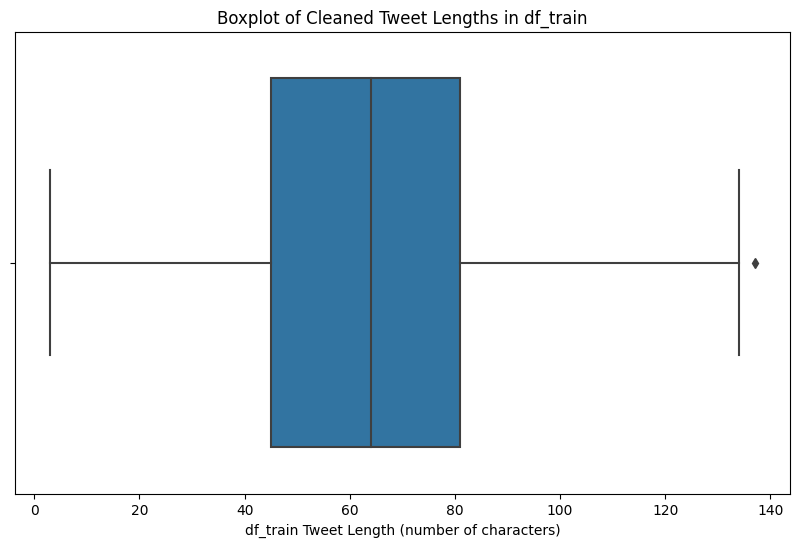

In [ ]:
# visualizing the length features of the cleaned tweets in df_train with boxplot
# getting an impression of the tweets' length and checking for outliers
import seaborn as sns
df_train['cleaned_text_length'] = df_train['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['cleaned_text_length'])
plt.title('Boxplot of Cleaned Tweet Lengths in df_train')
plt.xlabel('df_train Tweet Length (number of characters)')
plt.show()

<ipython-input-24-cd2509965f8b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['cleaned_text_length'], bins=30, kde=True, hist_kws={'edgecolor':'black'})


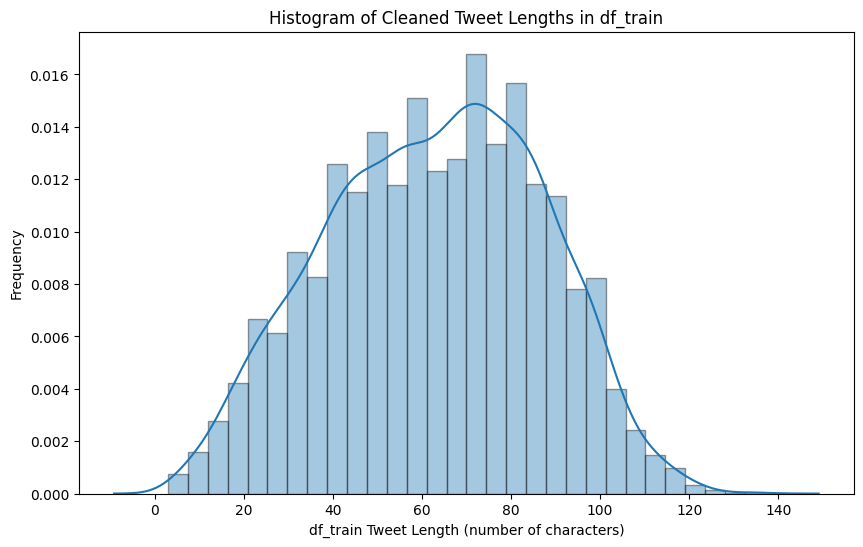

In [ ]:
# visualizing the length distribution of the cleaned tweets in df_train
# getting a more detailed view of the tweets' length and checking for outliers
plt.figure(figsize=(10, 6))
sns.distplot(df_train['cleaned_text_length'], bins=30, kde=True, hist_kws={'edgecolor':'black'})
plt.title('Histogram of Cleaned Tweet Lengths in df_train')
plt.xlabel('df_train Tweet Length (number of characters)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# removing the one outlier in df_train, i.e. the longest tweet represented by the leftmost dot in the boxplot
df_train_max_length = df_train['cleaned_text_length'].max()
print("max length of the cleaned tweets in df_train = ", df_train_max_length)

df_train_max_length_index = df_train['cleaned_text_length'].idxmax()
df_train_max_length_row = df_train.loc[df_train_max_length_index]
df_train_max_length_id = df_train_max_length_row['id']
print("the index of the cleaned tweet with the max length in df_train = ", df_train_max_length_index)
print("the id of the cleaned tweet with the max length in df_train = ", df_train_max_length_id)

df_train = df_train.drop(df_train_max_length_index)

max length of the cleaned tweets in df_train =  137
the index of the cleaned tweet with the max length in df_train =  1540
the id of the cleaned tweet with the max length in df_train =  2225


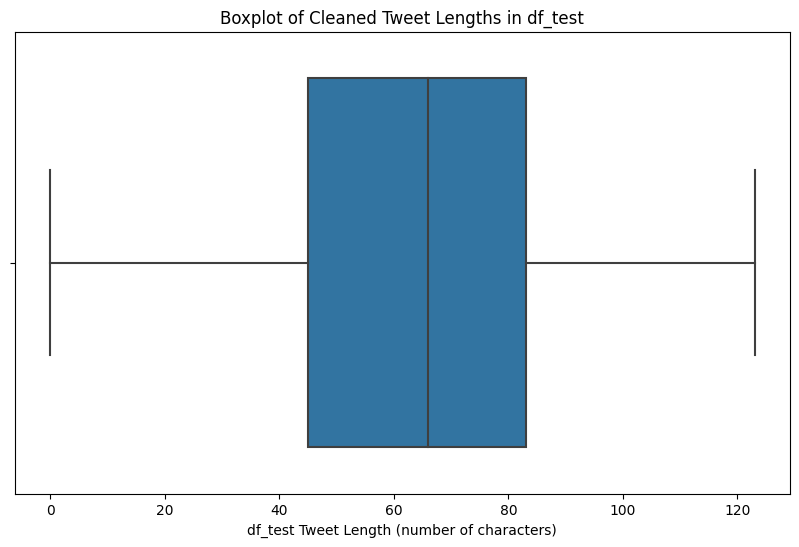

In [ ]:
# visualizing the length features of the cleaned tweets in df_test with boxplot
# only for an impression of the tweets' length and checking whether or not it resembles df_train
df_test['cleaned_text_length'] = df_test['cleaned_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test['cleaned_text_length'])
plt.title('Boxplot of Cleaned Tweet Lengths in df_test')
plt.xlabel('df_test Tweet Length (number of characters)')
plt.show()

<ipython-input-27-cf26f3edac7f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['cleaned_text_length'], bins=30, kde=True, hist_kws={'edgecolor':'black'})


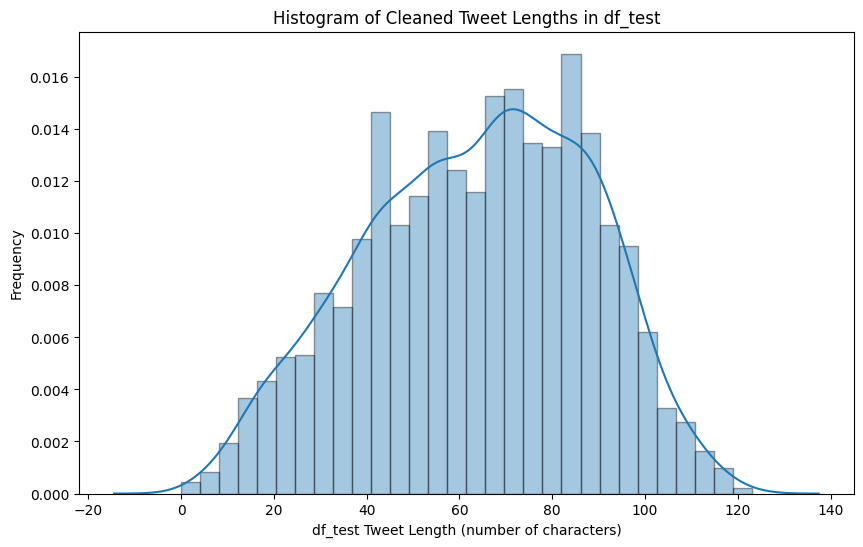

In [ ]:
# visualizing the length distribution of the cleaned tweets in df_test
# only for a more detailed view of the tweets' length and checking whether or not it resembles df_train
plt.figure(figsize=(10, 6))
sns.distplot(df_test['cleaned_text_length'], bins=30, kde=True, hist_kws={'edgecolor':'black'})
plt.title('Histogram of Cleaned Tweet Lengths in df_test')
plt.xlabel('df_test Tweet Length (number of characters)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# finalized df_train
print("finalized df_train:")
print(df_train.shape)
df_train.head()

finalized df_train:
(7612, 5)


,id,text,target,cleaned_text,cleaned_text_length
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,42
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,37
2,5,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,85
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,51
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,54


In [ ]:
# finalized df_test
print("finalized df_test:")
print(df_test.shape)
df_test.head()

finalized df_test:
(3263, 4)


,id,text,cleaned_text,cleaned_text_length
0,0,Just happened a terrible car crash,happened terrible car crash,27
1,2,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,50
2,3,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,54
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,36
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,34


In [ ]:
# computing the vocab size, i.e. the number of unique words in df_train and df_test
all_texts = pd.concat([df_train['cleaned_text'], df_test['cleaned_text']])
all_unique_words = set(word for text in all_texts for word in text.split())
all_vocab_size = len(all_unique_words)
print("the vocabulary size of all the text data is:", all_vocab_size)

# computing the vocab size, i.e. the number of unique words in df_train
df_train_unique_words = set(word for text in df_train['cleaned_text'] for word in text.split())
df_train_vocab_size = len(df_train_unique_words)
print("the vocabulary size of df_train is:", df_train_vocab_size)

# computing the vocab size, i.e. the number of unique words in df_test
df_test_unique_words = set(word for text in df_test['cleaned_text'] for word in text.split())
df_test_vocab_size = len(df_test_unique_words)
print("the vocabulary size of df_test is:", df_test_vocab_size)

the vocabulary size of all the text data is: 19458
the vocabulary size of df_train is: 15459
the vocabulary size of df_test is: 9212


##### Summary for EDA on the Text Data Using NLP Techniques:
I processed the tweets in the 'text' column of df_train and df_test, and stored them in a new column 'cleaned_text' in both dataframes. The raw tweets underwent the following text processing steps:
1. lowercasing
2. removing punctuations
3. removing new line characters "\n" and carriage return characters "\r"
4. removing non-English characters
5. removing http links
6. removing numbers
7. removing extra spaces
8. nlp: removing stop words
9. nlp: tokenization and lemmatization

To check for outliers in df_train, I visualized its length feature using a boxplot and distribution using a histogram. From these two plots I identified one outlier in df_train, which is the tweet with index 1540 or id 2225. It contains 137 words, much longer than the other tweets. Thus, I removed it from df_train.

The finalized datasets in this EDA subsection are:
1. df_train: 7612 rows, 5 columns ('id', 'text', 'target', 'cleaned_text', cleaned_text_length), vacabulary size 15459
2. df_train: 3263 rows, 4 columns ('id', 'text', 'cleaned_text', cleaned_text_length), vacabulary size 9212

### 4. Model Building, Training, Optimizing, and Evaluation
Scroll down to see summaries at the end of each subsection.

### 4.1 Data Splitting
Since df_train is a little bit imbalanced, with a roughly 60-40 class ratio for class 0 and 1. It is also not a very large dataset, with 7613 samples in total. Therefore, I will use a randomized and stratified 80-20 split df_train into a training and a validation subset df_train_sub and df_val_sub.

In [ ]:
# splitting df_train into df_train_sub and df_val_sub
from sklearn.model_selection import train_test_split
df_train_sub, df_val_sub = train_test_split(df_train, test_size=0.2, random_state=20231120, stratify=df_train['target'])
df_train_sub_label, df_val_sub_label = df_train_sub['target'], df_val_sub['target']

In [ ]:
print("df_train_sub.shape =",  df_train_sub.shape)
print("df_val_sub.shape =",  df_val_sub.shape)
print("df_train_sub_label.shape =",  df_train_sub_label.shape)
print("df_val_sub_label.shape =",  df_val_sub_label.shape)

df_train_sub.shape = (6089, 5)
df_val_sub.shape = (1523, 5)
df_train_sub_label.shape = (6089,)
df_val_sub_label.shape = (1523,)


number of samples for each class in df_train_sub: 0    3473
1    2616
Name: target, dtype: int64 

class ratios in df_train_sub: 0    0.570373
1    0.429627
Name: target, dtype: float64 



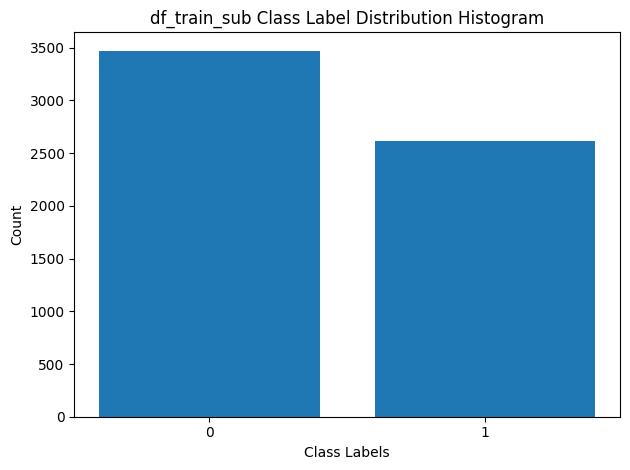

In [ ]:
# checking if the class ratio in df_train_sub roughly retains df_train's 60-40 class ratio for class 0 and 1
class_labels = df_train_sub_label
class_counts = class_labels.value_counts()
class_ratios = class_counts/class_counts.sum()
print("number of samples for each class in df_train_sub:", class_counts, "\n")
print("class ratios in df_train_sub:", class_ratios, "\n")

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('df_train_sub Class Label Distribution Histogram')
plt.xticks([0, 1])
plt.tight_layout()

number of samples for each class in df_val_sub: 0    869
1    654
Name: target, dtype: int64 

class ratios in df_val_sub: 0    0.570584
1    0.429416
Name: target, dtype: float64 



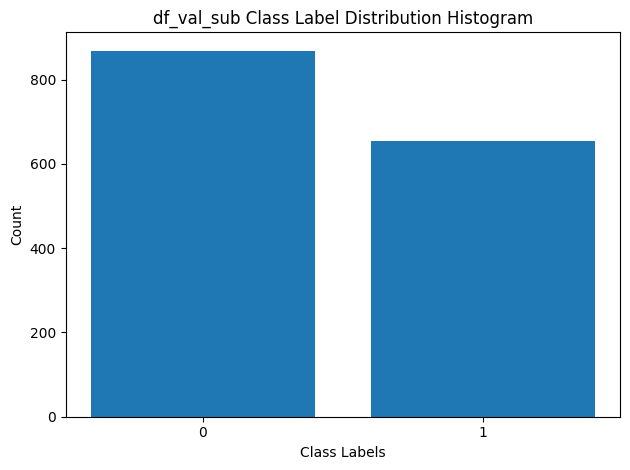

In [ ]:
# checking if the class ratio in df_val_sub roughly retains df_train's 60-40 class ratio for class 0 and 1
class_labels = df_val_sub_label
class_counts = class_labels.value_counts()
class_ratios = class_counts/class_counts.sum()
print("number of samples for each class in df_val_sub:", class_counts, "\n")
print("class ratios in df_val_sub:", class_ratios, "\n")

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('df_val_sub Class Label Distribution Histogram')
plt.xticks([0, 1])
plt.tight_layout()

##### Summary for Data Splitting:
I performed a 80-20 randomized and stratified split of df_train into df_train_sub and df_val_sub, which both roughly retain df_train's 60-40 class ratio for class 0 and 1.

### 4.2 Model Input Preparation: Preparing the Text Data for the RNN Models

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
## Keras tokenization: convert the text data into sequences of integers, where each integer represents a unique word
## padding: to ensure that all sequences have the same length by adding zeros at the end of shorter sequences

max_words = df_train_vocab_size # see boxplots and code EDA
max_len = df_train['cleaned_text_length'].max() # see code in EDA
trunc_type = 'post'; padding_type = 'post'; oov_tok = "<OOV>"

# initializing the Keras tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train_sub['cleaned_text'])

# Keras tokenizing texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(df_train_sub['cleaned_text'])
val_sequences = tokenizer.texts_to_sequences(df_val_sub['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(df_test['cleaned_text'])

# padding the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

# adding the padded sequences to the df_train_sub and df_val_sub
df_train_sub['input_text'] = list(train_padded)
df_val_sub['input_text'] = list(val_padded)
df_test['input_text'] = list(test_padded)

In [ ]:
print("df_train_sub.shape =",  df_train_sub.shape)
df_train_sub.head()

df_train_sub.shape = (6089, 6)


,id,text,target,cleaned_text,cleaned_text_length,input_text
56,80,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1,truck ablaze r voortrekker ave outside tambo i...,63,"[182, 602, 519, 5066, 958, 643, 5067, 5068, 26..."
314,457,@ENews Ben Affleck......I know there's a wife/...,0,enews ben afflecki know there wifekids girl ca...,92,"[5069, 1593, 5070, 39, 337, 5071, 170, 41, 100..."
3450,4934,If you told me ten years ago that I'd be seein...,0,told ten year ago id seeing anime big screen p...,68,"[836, 1187, 19, 520, 424, 959, 5073, 338, 1298..."
665,960,@GuiltyGearXXACP yeah I know but blaze blue do...,0,guiltygearxxacp yeah know blaze blue dont twit...,67,"[5074, 645, 39, 776, 679, 11, 483, 112, 3435, ..."
7531,10769,Check out 'Malaysia Confirms Plane Wreckage Is...,1,check malaysia confirms plane wreckage flight mh,48,"[162, 227, 1836, 456, 215, 777, 93, 0, 0, 0, 0..."


In [ ]:
print("df_val_sub.shape =",  df_val_sub.shape)
df_val_sub.head()

df_val_sub.shape = (1523, 6)


,id,text,target,cleaned_text,cleaned_text_length,input_text
6289,8985,#NASA announced that a massive #solar storm is...,1,nasa announced massive solar storm headed stra...,52,"[4252, 8086, 1939, 3008, 29, 1676, 1535, 7, 0,..."
6634,9501,HereÛªs how media in Pakistan covered the cap...,0,here medium pakistan covered capture terrorist...,61,"[1406, 478, 653, 1997, 917, 172, 10248, 2606, ..."
4222,5997,#what #tribal Olap #world pres: http://t.co/Jw...,0,tribal olap world pres recognize hazardous was...,61,"[1948, 12186, 40, 3386, 3411, 299, 3426, 12187..."
77,112,Traffic accident N CABRILLO HWY/MAGELLAN AV MI...,1,traffic accident n cabrillo hwymagellan av mir,46,"[552, 60, 495, 1, 1, 3920, 1, 0, 0, 0, 0, 0, 0..."
6836,9791,@BoyInAHorsemask its a panda trapped in a dogs...,1,boyinahorsemask panda trapped dog body,38,"[1, 1, 332, 556, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
print("df_test.shape =",  df_test.shape)
df_test.head()

df_test.shape = (3263, 5)


,id,text,cleaned_text,cleaned_text_length,input_text
0,0,Just happened a terrible car crash,happened terrible car crash,27,"[1016, 1691, 43, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,2,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,50,"[328, 136, 1215, 114, 361, 2437, 168, 0, 0, 0,..."
2,3,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,54,"[108, 2, 712, 3267, 1, 4696, 869, 476, 199, 0,..."
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,36,"[312, 2855, 1, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,34,"[412, 633, 113, 238, 1095, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
# now here are the X and y ready for model input with tensorflow
import numpy as np
X_train = np.array(df_train_sub['input_text'].tolist())
X_val = np.array(df_val_sub['input_text'].tolist())
y_train = np.array(df_train_sub_label)
y_val = np.array(df_val_sub_label)

X_test = np.array(df_test['input_text'].tolist())

In [ ]:
print("X_train.shape =", X_train.shape)
print("X_val.shape =", X_val.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (6089, 134)
X_val.shape = (1523, 134)
X_test.shape = (3263, 134)


##### Summary for Model Input Preparation:
I tokenized the 'cleaned_text' in df_train_sub, df_val_sub, and df_test into sequences of unique integers, padded them to ensure that they have the same length, and stored them in 'input_text' in each dataset. Now, the following variables are ready for RNN model input:
1. X_train: 6089 training samples
2. X_val: 1523 validation samples
3. y_train: 6089 training ground-truth labels
4. y_val: 1523 validation ground-truth labels
5. X_test: 3263 test samples

### 4.3 The LSTM Model

In [ ]:
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(64))
LSTM_model.add(Dense(32, activation='relu'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = LSTM_model.fit(X_train, y_train, epochs=2, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/2
96/96 [==============================] - 68s 667ms/step - loss: 0.6874 - accuracy: 0.5705 - val_loss: 0.6833 - val_accuracy: 0.5706
Epoch 2/2
96/96 [==============================] - 43s 445ms/step - loss: 0.6840 - accuracy: 0.5704 - val_loss: 0.6834 - val_accuracy: 0.5706


In [ ]:
# getting the overall scores of the validataion dataset
from sklearn.metrics import classification_report
print("LSTM_model performance statistics overview on the validation dataset:")
LSTM_val_pred = (LSTM_model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, LSTM_val_pred))

LSTM_model performance statistics overview on the validation dataset:
48/48 [==============================] - 7s 123ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


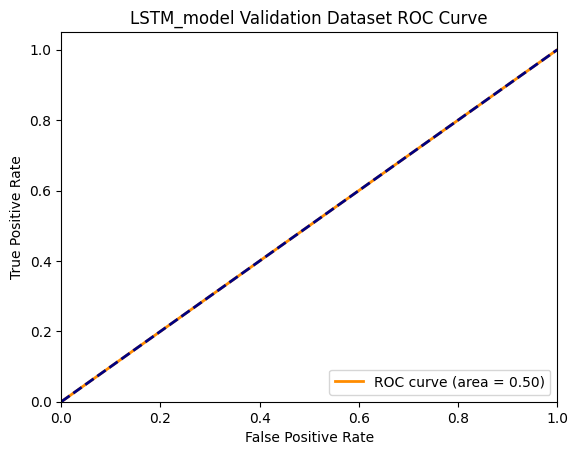

In [ ]:
# visualizing the AUC score of the validation dataset
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, LSTM_val_pred)
auc_score = roc_auc_score(y_val, LSTM_val_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM_model Validation Dataset ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Summary of the LSTM Model:
The LSTM model I built has this very basic architecture: LSTM -> Dropout -> LSTM -> Dense -> Droupout -> Dense -> Adam Optimizer. The hyperparameters are manually tuned through several iterations, considering the massive computational cost for using GridSearchCV or Keras Tuner Hyperband.

It has an auc score of 0.5 and an accuracy score of 0.5706 on its validation dataset. However, I wonder why its F1 score for label 1 is 0?

### 4.4 The GRU Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
GRU_model = Sequential()
GRU_model.add(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
GRU_model.add(Dropout(0.5))
GRU_model.add(GRU(64))
GRU_model.add(Dense(32, activation='relu'))
GRU_model.add(Dropout(0.5))
GRU_model.add(Dense(1, activation='sigmoid'))

GRU_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = GRU_model.fit(X_train, y_train, epochs=2, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/2
96/96 [==============================] - 41s 369ms/step - loss: 0.6895 - accuracy: 0.5697 - val_loss: 0.6852 - val_accuracy: 0.5706
Epoch 2/2
96/96 [==============================] - 34s 354ms/step - loss: 0.6861 - accuracy: 0.5704 - val_loss: 0.6837 - val_accuracy: 0.5706


In [ ]:
# getting the overall scores of the validataion dataset
from sklearn.metrics import classification_report
print("GRU_model performance statistics overview on the validation dataset:")
GRU_val_pred = (GRU_model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, GRU_val_pred))

GRU_model performance statistics overview on the validation dataset:
48/48 [==============================] - 4s 62ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


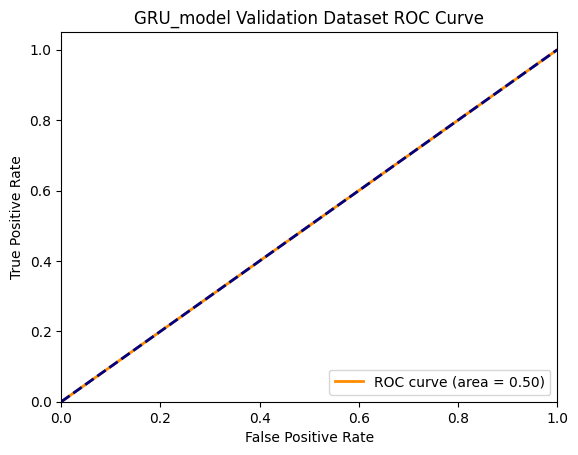

In [ ]:
# visualizing the AUC score of the validation dataset
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_val, GRU_val_pred)
auc_score = roc_auc_score(y_val, GRU_val_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GRU_model Validation Dataset ROC Curve')
plt.legend(loc="lower right")
plt.show()

##### Summary of the GRU Model:
The GRU model I built has this very basic architecture: GRU -> Dropout -> GRU -> Dense -> Droupout -> Dense -> Adam Optimizer. The hyperparameters are manually tuned through several iterations, considering the massive computational cost for using GridSearchCV or Keras Tuner Hyperband.

It has an auc score of 0.5 and an accuracy score of 0.5706 on its validation dataset, the same as the one from the LSTM model. However, I wonder why its F1 score for label 1 is 0?

### 5. Results

In [ ]:
# LSTM_model predictions
LSTM_test_pred = (LSTM_model.predict(X_test) > 0.5).astype("int32").flatten()
LSTM_df_test = pd.DataFrame({'id': df_test['id'], 'target': LSTM_test_pred})
LSTM_df_test.head()

102/102 [==============================] - 7s 71ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
LSTM_df_test.to_csv('LSTM_df_test.csv', index=False)

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download('LSTM_df_test.csv')

In [ ]:
# GRU_model predictions
GRU_test_pred = (GRU_model.predict(X_test) > 0.5).astype("int32").flatten()
GRU_df_test = pd.DataFrame({'id': df_test['id'], 'target': GRU_test_pred})
GRU_df_test.head()

102/102 [==============================] - 6s 56ms/step


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
GRU_df_test.to_csv('GRU_df_test.csv', index=False)

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download('GRU_df_test.csv')

### 6. Conclusion and Limitations
Surprisingly and unfortunately, both my very basic LSTM and GRU model result in the same relatively low performance scores. I expected GRU to score higher since the tweets are genereally pretty short, which is more suitable for GRU than LSTM. This might be caused by a few problems:

1. Some steps in the text processing might be problematic:
(1) I removed all the punctuations, special symbols, and numbers in the raw tweets. However, contextually irrelavent punctuations, symbols, numbers might add noise, but contextually relevant ones can add valuable information. I removed all of them out of simplicity.
(2) Some extra spaces somehow remains after my attempt stripping all of them out.

2. LSTM and GRU model architecture might not be optimal:
I did not bother to do a very deep research into LSTM and GRU model architecture but chose very basic architectures for both. A more sophisticated model architecture should result in better performance.

3. LSTM and GRU model hyperparameters might not be optimal:
The hyperparameters are manually tuned through several iterations, considering the massive computational cost of iterating through these RNN models using GridSearchCV or Keras Tuner Hyperband.

Nevertheless, my GRU model got a Kaggle score 0.57033, which landed me a Leaderboard position of 1091 out of 1126. This score is not ideal, but I did learn about NLP and RNN models in this project.

Please suggest me what to improve, thank you!
P.s. See questions in the summaries of the models.

### 7. References
Kaggle Competition: https://www.kaggle.com/competitions/nlp-getting-started/overview <br>
Kaggle Datasets: https://www.kaggle.com/competitions/nlp-getting-started/data <br>
Sentdex. (2015). NLTK with Python 3 for Natural Language Processing. Youtube. https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL